# Task 1b: Build a logistic regression model 


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load your dataset into a Pandas DataFrame (assuming it's in a CSV format)
df = pd.read_csv('student_data.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


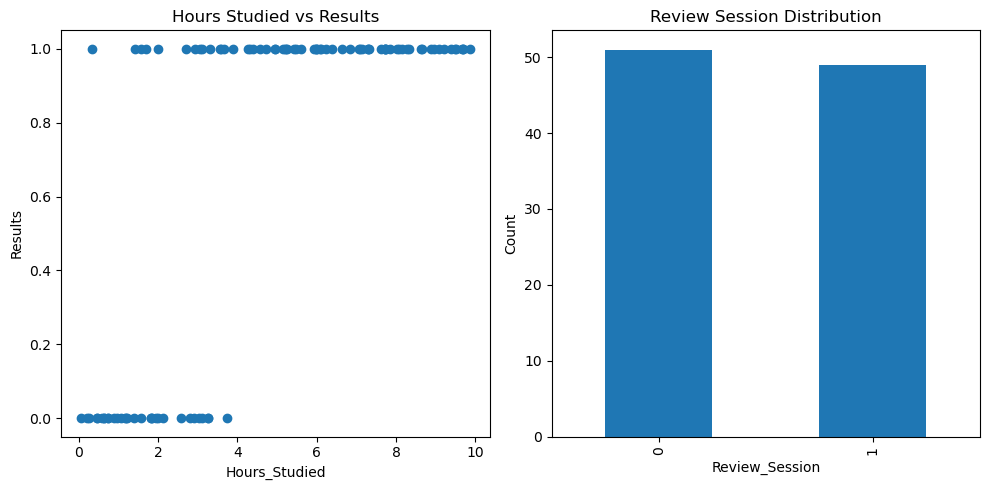

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
plt.figure(figsize=(10, 5))

# Scatter plot for Hours_Studied vs Results
plt.subplot(1, 2, 1)
plt.scatter(df['Hours_Studied'], df['Results'])
plt.xlabel('Hours_Studied')
plt.ylabel('Results')
plt.title('Hours Studied vs Results')

# Bar chart for Review_Session
plt.subplot(1, 2, 2)
df['Review_Session'].value_counts().plot(kind='bar')
plt.xlabel('Review_Session')
plt.ylabel('Count')
plt.title('Review Session Distribution')

plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Assuming you've already loaded your data into 'X' (features) and 'y' (target variable)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Model Coefficients:
Coefficients: [[1.40365599 1.42846816]]
Intercept: [-4.58136123]

Model Performance Metrics:
Accuracy: 0.85
ROC AUC: 0.8452380952380952
Confusion Matrix:
 [[ 5  1]
 [ 2 12]]


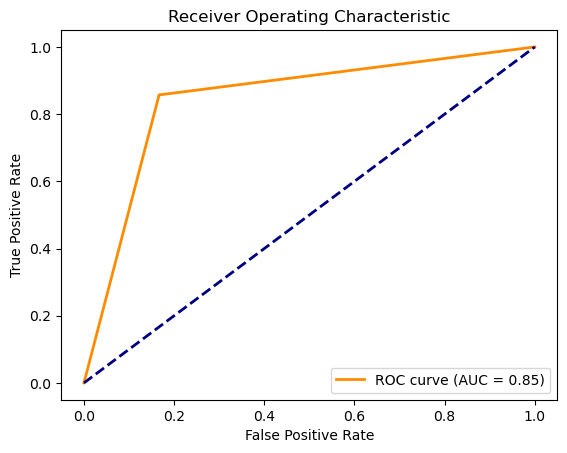

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Performance Metrics:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Task 2:  Understanding and Prevent Overfitting in the context of SVM 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your data into 'X' (features) and 'y' (target variable)
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Linear SVM Accuracy:", accuracy)


Linear SVM Accuracy: 0.85


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your data into 'X' (features) and 'y' (target variable)
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of gamma values to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create an SVM model with an RBF kernel
rbf_svm = SVC(kernel='rbf')

# Perform grid search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
best_params = grid_search.best_params_
best_rbf_svm = grid_search.best_estimator_

# Fit the best RBF SVM model with the entire training dataset
best_rbf_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rbf_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best RBF SVM Parameters:", best_params)
print("Best RBF SVM Accuracy:", accuracy)


Best RBF SVM Parameters: {'C': 1, 'gamma': 1}
Best RBF SVM Accuracy: 0.85
